# Lab 2.1: Hypothesis Testing

The Skykomish River in Washington state appears to have had a change in streamflow around the year 1975. 
* Test for statistical significance of the observed change in the mean annual flood. 
* Use a two-sample test, with alpha=0.05 (i.e. 95% confidence) and the z-distribution to define the rejection region.

Why is it appropriate to use the z-distribution here? (consider the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem))

---

In [85]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# Filepath to our excel file.
skykomish_data_file = '../data/Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'

# Use pandas.read_excel() function to open this file.
skykomish_data = pd.read_excel(skykomish_data_file)

# Now we can see the dataset we loaded:
skykomish_data.head(3)

,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08


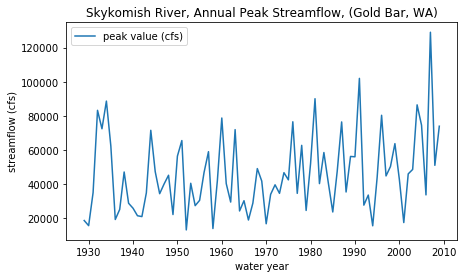

In [87]:
# Plot peak streamflows per water year
fig, ax = plt.subplots(figsize=(7,4))

skykomish_data.plot(x='water year', y='peak value (cfs)', ax=ax)
ax.set_ylabel('streamflow (cfs)');
ax.set_title('Skykomish River, Annual Peak Streamflow, (Gold Bar, WA)');

---
We are postulating that there was an change in peak flows around 1975. In other words, how likely is it that the mean of peak flows before 1975 comes from the same distribution as the mean of peak flows after 1975?

To start, let's split the data in two:

In [88]:
# Divide the data into the early period (before 1975) and late period (after and including 1975). 

skykomish_before = skykomish_data[ skykomish_data['water year'] < 1975 ]
skykomish_after = skykomish_data[ skykomish_data['water year'] >= 1975 ]

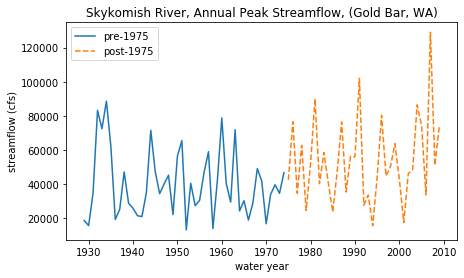

In [89]:
# Plot our two time periods
fig, ax = plt.subplots(figsize=(7,4))

skykomish_before.plot(x='water year', y='peak value (cfs)', ax=ax, linestyle='-', label='pre-1975')
skykomish_after.plot(x='water year', y='peak value (cfs)', ax=ax, linestyle='--', label='post-1975')

ax.set_ylabel('streamflow (cfs)');
ax.set_title('Skykomish River, Annual Peak Streamflow, (Gold Bar, WA)');

**What does the distribution of streamflows in each period look like?**

Plot a histogram for each period:

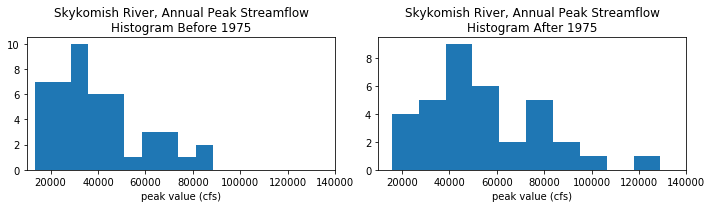

In [90]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

ax1.hist(skykomish_before['peak value (cfs)'], bins=10)
ax1.set_xlim((1e4,1.4e5))
ax1.set_xlabel('peak value (cfs)')
ax1.set_title('Skykomish River, Annual Peak Streamflow\nHistogram Before 1975')

ax2.hist(skykomish_after['peak value (cfs)'], bins=10)
ax2.set_xlim((1e4,1.4e5))
ax2.set_xlabel('peak value (cfs)')
ax2.set_title('Skykomish River, Annual Peak Streamflow\nHistogram After 1975');

plt.tight_layout()

---
Visually compare the distributions of the data, before and after 1975, with theoretical distributions, and random numbers generated from theoretical distributions.

In [91]:
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

In [108]:
# Use the cunnane quantile function for before 1975
skykomish_before_b = cunnane_quantile(skykomish_before, 'peak value (cfs)')

# Create theoretical normal CDF based on our sample values before 1975
theoretical_cdf_b = stats.norm.cdf(skykomish_before_b['peak value (cfs)'].values,
                                 skykomish_before_b['peak value (cfs)'].mean(),
                                 skykomish_before_b['peak value (cfs)'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal_b = np.random.normal(skykomish_before_b['peak value (cfs)'].mean(),
                                 skykomish_before_b['peak value (cfs)'].std(ddof=1),
                                 size=skykomish_before_b['peak value (cfs)'].count())
# This line uses "list comprehension" to sort my random data, and compute the Cunnane Plotting Position, all at once
random_cdf_b = np.array([[((i + 1) - (2/5)) / (len(random_normal_b) + (1/5)), n] for i, n in enumerate(np.sort(random_normal_b))])

In [109]:
# Use the cunnane quantile function for after 1975
skykomish_after_a = cunnane_quantile(skykomish_after, 'peak value (cfs)')

# Create theoretical normal CDF based on our sample values before 1975
theoretical_cdf_a = stats.norm.cdf(skykomish_after_a['peak value (cfs)'].values,
                                 skykomish_after_a['peak value (cfs)'].mean(),
                                 skykomish_after_a['peak value (cfs)'].std(ddof=1))

# Generate random numbers from a theoretical normal CDF based on our samples before 1975
random_normal_a = np.random.normal(skykomish_after_a['peak value (cfs)'].mean(),
                                 skykomish_after_a['peak value (cfs)'].std(ddof=1),
                                 size=skykomish_after_a['peak value (cfs)'].count())
# This line uses "list comprehension" to sort my random data, and compute the Cunnane Plotting Position, all at once
random_cdf_a = np.array([[((i + 1) - (2/5)) / (len(random_normal_a) + (1/5)), n] for i, n in enumerate(np.sort(random_normal_a))])

Text(0.5, 1.0, 'Skykomish River, Annual Peak Streamflow CDF\nAfter 1975')

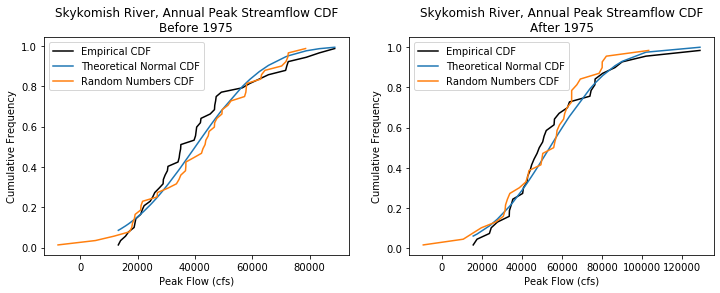

In [111]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Before 1975
# Empirical CDF
ax1.plot(skykomish_before_b['peak value (cfs)'], skykomish_before_b['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax1.plot(skykomish_before_b['peak value (cfs)'], theoretical_cdf_b, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax1.plot(random_cdf_b[:,1],random_cdf_b[:,0],'-', label='Random Numbers CDF')
# Add legend and labels
ax1.legend()
ax1.set_ylabel('Cumulative Frequency')
ax1.set_xlabel('Peak Flow (cfs)')
ax1.set_title('Skykomish River, Annual Peak Streamflow CDF\nBefore 1975')

# After 1975
# Empirical CDF
ax2.plot(skykomish_after_a['peak value (cfs)'], skykomish_after_a['cunnane_plotting_position'], color='k', label='Empirical CDF')
# Theorectical Normal CDF
ax2.plot(skykomish_after_a['peak value (cfs)'], theoretical_cdf_a, label='Theoretical Normal CDF')
# Random numbers CDF from a theoretical normal distribution
ax2.plot(random_cdf_a[:,1],random_cdf_a[:,0],'-', label='Random Numbers CDF')
# Add legend and labels
ax2.legend()
ax2.set_ylabel('Cumulative Frequency')
ax2.set_xlabel('Peak Flow (cfs)')
ax2.set_title('Skykomish River, Annual Peak Streamflow CDF\nAfter 1975')

Does the streamflow data look normally distributed? Maybe try changing the above code to compare the empirical CDFs against theoretical lognormal distributions. (Remember to transform the mean and standard deviations into "log space")

---
## Z-Distribution

#### Returning to our question: We are postulating (making a hypothesis) that there was a change in the mean flood statistics after 1975, and we want to test whether this is true.  Where do we start?

First we can formally state our null hypothesis, and our alternative hypothesis. We are also told to use a two sample test, and to set $\alpha$ at 5%.

Our null hypothesis is that the peak flows of the early period are drawn from the same distribution as the peak flows of the later period (the distributions means are equal):

$H_0: \mu_{early} = \mu_{late}$

Our alternative hypothesis is that the mean of the distribution for the later period is greater than that of the early period:

$H_1: \mu_{late} > \mu_{early}$


Note that I have written a "[one-sided](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests)" test here because we are testing only for a change in one direction.

We think that either the mean flood increased or it didn't change; we do not think the mean flood decreased.  This might be chosen because we have some physical reason to think it increased (maybe it's raining at higher elevations now when it used to be snowing) or because we have some practical reason for the test to matter in this particular direction (maybe we will change flood zoning and/or reservoir levels if the mean flood has increased but don't care at all if it decreased).

### But which test should we use?  Is the z-distribution valid?

We are using the [z-test](https://en.wikipedia.org/wiki/Z-test), which uses a standard-normal distribution. From our work above, we know that our data are likely not neccesarily normally distributed. However, the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) tells us that, "*If a sample of n values is extracted at random from a population with mean  μ and standard deviation σ, and n > 30, then the means of these samples are approximately normally distributed*"

And we calculate our z-score as: $\displaystyle Z={\frac {({\bar {X}}-\mu _{0})}{s}}$

#### Remember, the means are normally distributed even if the data themselves are not normally distributed.

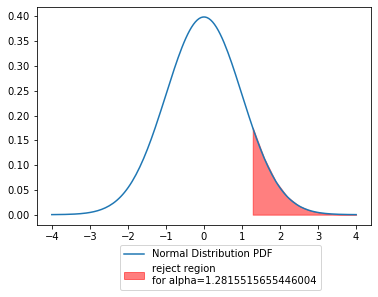

In [115]:
fig, ax = plt.subplots()
# Create a null pdf
x = np.linspace(-4, 4, num=160)
ax.plot(x, stats.norm.pdf(x, 0, 1), label='Normal Distribution PDF')
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 0.90
z_alpha = stats.norm.ppf(conf)
shade = np.linspace(z_alpha, 4, 10)
ax.fill_between(shade, stats.norm.pdf(shade, 0, 1) ,  color='red', alpha=0.5, label='reject region\nfor alpha={}'.format(z_alpha))
ax.legend(loc=(0.25,-0.3));

In [24]:
# Check that we have a large enough sample size (n>30)
n = len(Skykomish_early['peak value (cfs)'])
m = len(Skykomish_late['peak value (cfs)'])
print(n)
print(m)

46
35


In [25]:
# We're okay, both are longer than 30, so Calculate the z-test, p-value

# if alpha is set at 0.5, the confidence is 1-alpha:
conf = 0.95

# Out null hypothesis is no change, so mu_late - mu_early = 0
delta_0 = 0

# We determine which value in the z-distribution corresponds to 0.95 in the cdf
z_alpha = st.norm.ppf(conf)
print("z_alpha =") 
print(z_alpha)

mean1 = stats.mean(Skykomish_early['peak value (cfs)'])
mean2 = stats.mean(Skykomish_late['peak value (cfs)'])

sd1 = stats.stdev(Skykomish_early['peak value (cfs)'])
sd2 = stats.stdev(Skykomish_late['peak value (cfs)'])

pooled_sd = math.sqrt(sd1**2/n + sd2**2/m)

ztest = (mean2 - mean1 - delta_0)/pooled_sd

print("z_test =") 
print(ztest)
p = 1 - st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
2.7124170100371323
p = 
0.0033397252298450475


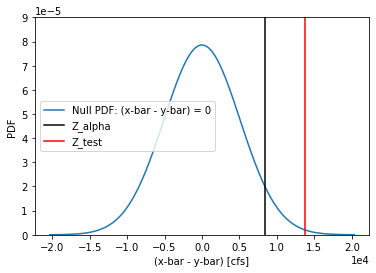

In [26]:
# Plot the results

plt.figure()

x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]

plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 9e-5)
plt.legend(loc='best')

### How would the estimate of p change if the null hypothesis is that the difference in the means is equal to 10% of the mean of the early period, and the alternative hypothesis is that greater than a 10% change occurred?

In [27]:
# Calculate the z-test, p-value

# Now, our change is not 0.  Now we think mu_late - mu_early = 0.10*mu_early
delta = .1 * mean1

z_alpha_2 = st.norm.ppf(conf, delta, pooled_sd)
# Note that this one is different from the one aboee because the delta and sd are
# included in the function

ztest2 = (mean2 - mean1 - delta)/pooled_sd

p_2 = 1 - st.norm.cdf(ztest)

print(z_alpha_2, ztest2, ztest2*pooled_sd)

12364.701045073207 1.9222408079352344 9760.838509316765


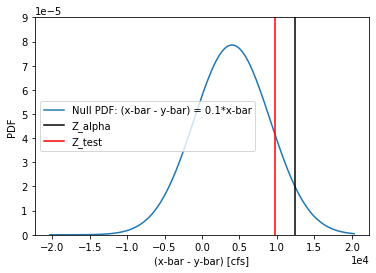

In [28]:
# Plot the results

plt.figure()

plt.plot(x, st.norm.pdf(x, delta, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0.1*x-bar')
plt.axvline(z_alpha_2, color='black', label='Z_alpha')
plt.axvline(ztest2*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cfs]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 9e-5)
plt.legend(loc='best')

## So what happened up above?
We created a more stringent test.  Say, for example, that we only would raise levees if the mean flood (defined by the annual peak flow) increased by more than 10%.  While we are 95% sure that there is a change greater than 0; we are _not_ 95% sure that the change is greater than 10% of the early period mean.